## Install dependencies

In [ ]:
!nvidia-smi

Sat Nov  4 17:14:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git #clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16051, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 16051 (delta 46), reused 44 (delta 25), pack-reused 15967
Receiving objects: 100% (16051/16051), 14.62 MiB | 25.94 MiB/s, done.
Resolving deltas: 100% (11012/11012), done.
/content/yolov5


In [ ]:
#install dependencies as necessary
!pip install -r requirements.txt
import torch

from IPython.display import Image,clear_output # to display images
#from utils.goggle_utils import gdrive_download #to download models/datasets

#clear_output()
print('Setup complete.using torch %s %s' % (torch.__version__,torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00
Setup complete.using torch 2.1.0+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [ ]:
pwd

'/content/yolov5'

In [ ]:
%cd /content

/content


In [ ]:
import gdown
url="https://drive.google.com/file/d/1v-o_OdAta0hYbp4m527_v18tAzDBseNO/view?usp=sharing"

file_id=url.split("/")[-2] #it gives the id before the last back slash part
print(file_id)

1v-o_OdAta0hYbp4m527_v18tAzDBseNO


In [ ]:
prefix='https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id)
print("Data downloaded")


Downloading...
From: https://drive.google.com/uc?/export=download&id=1v-o_OdAta0hYbp4m527_v18tAzDBseNO
To: /content/waste-detection.zip
100%|██████████| 40.1M/40.1M [00:00<00:00, 85.0MB/s]

Data downloaded


In [ ]:
!unzip waste-detection.zip
!rm -rf waste-detection.zip

Archive:  waste-detection.zip
  inflating: data.yaml               
   creating: train/
   creating: train/images/
  inflating: train/images/Banana_10_jpg.rf.7c0536bc9eb72ec77c8f515653f44fb9.jpg  
  inflating: train/images/Banana_11_jpg.rf.188551ec3d51326e5562675d285d0e6a.jpg  
  inflating: train/images/Banana_12_jpg.rf.2ecabc9628a9611963e4804d13045377.jpg  
  inflating: train/images/Banana_12_jpg.rf.e951f9b4b66c9896ce6b7a56f9d41438.jpg  
  inflating: train/images/Banana_15_jpg.rf.09c5d34e95e0c06a808a99533e8e737c.jpg  
  inflating: train/images/Banana_15_jpg.rf.c2909c26fa3140f1734b451bead6752b.jpg  
  inflating: train/images/Banana_15_jpg.rf.e7fb3723604fb753bdbca26f382d7aaf.jpg  
  inflating: train/images/Banana_16_jpg.rf.504aa1c1679f9d595e336eba25f6d80c.jpg  
  inflating: train/images/Banana_16_jpg.rf.73833169c2979508c979f27bcb572959.jpg  
  inflating: train/images/Banana_16_jpg.rf.bd09b3cf6ae33d668a421a48b8c4b34b.jpg  
  inflating: train/images/Banana_16_jpg.rf.dbfad378a52e84709bbb24

In [ ]:
# this is the YAML file we're loading into this notebook with our data
%cat data.yaml #using cat command u can read the file

train: ../train/images
val: ../valid/images


nc: 13
names: ['banana', 'chilli', 'drinkcan', 'drinkpack', 'foodcan', 'lettuce', 'paperbag', 'plasticbag', 'plasticbottle', 'plasticcontainer', 'sweetpotato', 'teabag', 'tissueroll']



#define model configuration and architecture

### we will write a yaml script that defines the parameters for our model like the number of classes ,anchors, and each layer.Yor do not need to edit these cells

In [ ]:
import yaml
with open("data.yaml",'r') as stream:
  num_classes=str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'13'

In [ ]:
# this is the condfiguration to train yolov5 we use it as our pretrained model for our model training
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [ ]:
#customize ipython writefile so we can write_variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

#Train Custom YOLOv5 Detector

##img:define input image size
##batch:determine batch size
##epochs:define the number of training epochs.
##data:set the path to our yaml file
##cfg:set our model configuration
v
cache:cahe images for faster training


In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 50 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results --cache


/content/yolov5
2023-11-04 17:14:28.625041: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 17:14:28.625106: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 17:14:28.625148: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optim

##Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the --name flag when we train. In our case, we named this yolov5s_results. (If given no name, it defaults to results.txt.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed results.txt files can be plotted with from utils.utils import plot_results; plot_results().

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%reload_ext tensorboard
%tensorboard --logdir runs

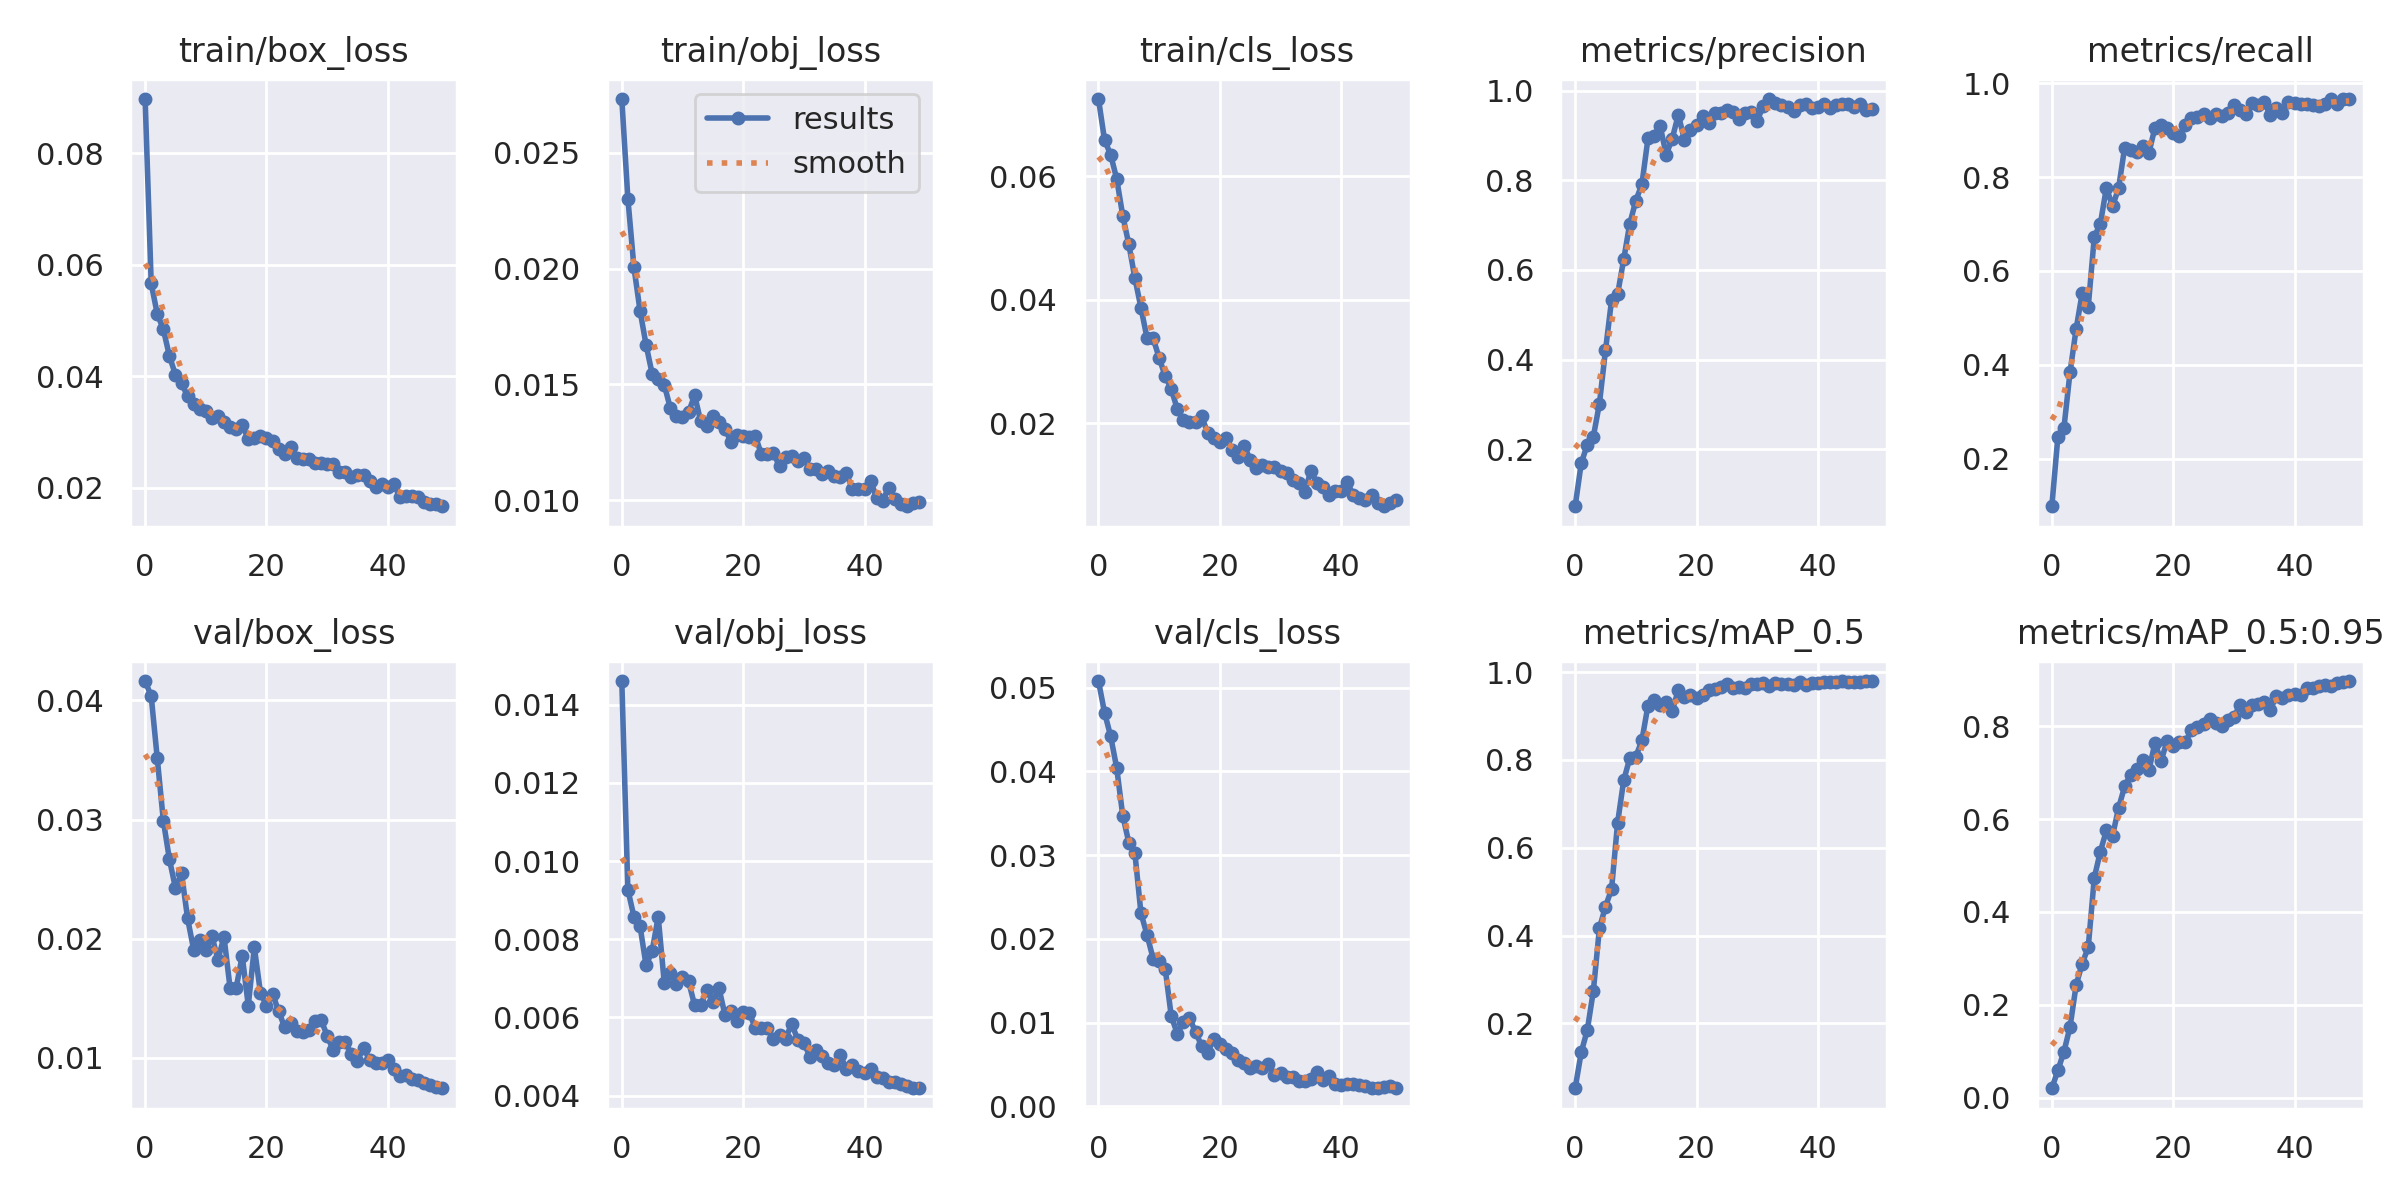

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason...
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

#Curious? Visualize Our Training Data with Labels
After training starts, view train*.jpg images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in YOLOv4.

In [ ]:

# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

#Run Inference With Trained Weights
Run inference with a pretrained checkpoint on contents of test/images folder downloaded from Roboflow.

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source ../valid/images


/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-235-g6ca8f33 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/459 /content/valid/images/Banana_10_jpg.rf.0f4f5f5b749f5681048000d59b667d94.jpg: 416x320 1 banana, 77.9ms
image 2/459 /content/valid/images/Banana_10_jpg.rf.5d587c81371bd16a3a5eba3af30ce089.jpg: 416x320 1 banana, 7.9ms
image 3/459 /content/valid/images/Banana_11_jpg.rf.4db17dd527857ce32b0a

#Export Trained Weights for Future Inference
Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/MyDrive/Research/SignLanguageDetection/model